In [36]:
from main import main
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [37]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [38]:
with open("data/pkl/0.1/precisions.pkl", "rb") as f:
    precisions = pickle.load(f)
with open("data/pkl/0.1/recalls.pkl", "rb") as f:
    recalls = pickle.load(f)
with open("data/pkl/0.1/f1_scores.pkl", "rb") as f:
    f1_scores = pickle.load(f)
with open("data/pkl/0.1/timings.pkl", "rb") as f:
    timings = pickle.load(f)

In [39]:
precision_means = []
precision_stds = []
last_iter = max(precisions[0].keys())
for i in range(last_iter+1):
    iter_values = [val[i] for val in precisions]
    precision_means.append(np.mean(iter_values))
    precision_stds.append(np.std(iter_values))

Text(0, 0.5, 'some numbers')

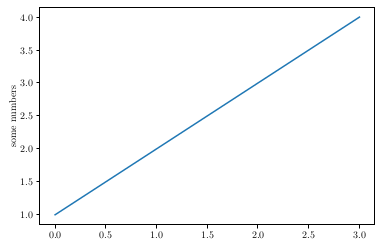

In [41]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')


<ErrorbarContainer object of 3 artists>

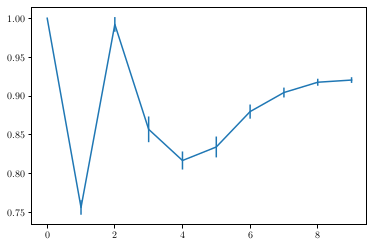

In [42]:
plt.errorbar(range(last_iter+1), precision_means, yerr=precision_stds)

In [7]:
recall_means = []
recall_stds = []
last_iter = max(recalls[0].keys())
for i in range(last_iter+1):
    iter_values = [val[i] for val in recalls]
    recall_means.append(np.mean(iter_values))
    recall_stds.append(np.std(iter_values))

In [24]:
plt.errorbar(range(last_iter+1), recall_means, yerr=recall_stds)

<ErrorbarContainer object of 3 artists>

In [8]:
f1_score_means = []
f1_score_stds = []
last_iter = max(f1_scores[0].keys())
for i in range(last_iter+1):
    iter_values = [val[i] for val in f1_scores]
    f1_score_means.append(np.mean(iter_values))
    f1_score_stds.append(np.std(iter_values))

In [9]:
plt.errorbar(range(last_iter+1), f1_score_means, yerr=f1_score_stds)

<ErrorbarContainer object of 3 artists>

In [10]:
timings_mean = np.mean(timings)
timings_std = np.std(timings)
plt.bar("Timing", timings_mean, yerr=timings_std)

<BarContainer object of 1 artists>

In [11]:
plt.boxplot(timings, labels=["Timing"]);

In [12]:
def bootstrap_metric(metric_list, n_iter):
    """Compute bootstrap means list to be used for computing confidence intervals
        using bootstrap resample"""
    means = []
    last_iter = max(metric_list[0].keys())
    metric_last = [val[last_iter] for val in metric_list]
    for i in range(n_iter):
        # Bootstrap
        metric_sample = np.random.choice(metric_last, size=len(metric_last), replace=True)
        means.append(np.mean(metric_sample))

    return means

In [13]:
def confidence_interval(means, conf_percent):
    # Computing low quantile (2.5 in our case)
    low_p = ((1.0 - conf_percent) / 2.0) * 100
    lower = np.percentile(means, low_p)

    # Computing high quantile
    high_p = (conf_percent + ((1.0 - conf_percent) / 2.0)) * 100
    upper = np.percentile(means, high_p)

    return [lower, upper]

In [14]:
means_precision = bootstrap_metric(precisions, 1000)

In [15]:
interval = confidence_interval(means_precision, 0.95)
print(interval)

[0.918946787260123, 0.9221453192865787]


In [16]:
def plot_confidence(means_metric, interval):
    # Computing the mean error
    mean = np.mean(means_metric)

    # Plot scores
    plt.hist(means_metric, bins=25)

    # Plot of two interval lines
    plt.axvline(interval[0], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(interval[1], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)

    plt.title("95.0 % confidence interval")
    plt.xlabel("A certain metric mean")
    plt.ylabel("Count")

In [17]:
plot_confidence(means_precision, interval)